# Contexte
Lors de ce projet nous incarnons un data analyst travaillant pour BottleNeck, un marchand de vin très prestigieux. Notre objectif est d'effectuer le rapprochement entre les deux outils de gestion de stock utilisés par l'entreprise, calculer le chiffre d'affaire et de procéder à une analyse des prix.

In [1]:
%matplotlib inline
#importe les librairies nécéssaires
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
#importe les scripts
from unicity_check import unicity_check
from null_ct import null_ct

# Traitement des données
On commence par importer les données des fichier CSV. Ensuite on renomme la colonne "id_web" dans la table Web en "sku" pour permettre la liaison entre les tables plus tard. On effectue une conversion sur la colonne "price" pour la transformer de chaîne de caractères à nombres décimaux. Enfin on vérifie l'unicité des clés primaires ainsi que l'absence de données dans les tables.

In [2]:
#Chargement des fichiers csv
Erp = pd.read_csv("erp.csv", sep=";")
Web = pd.read_csv("web.csv", sep=";")
Liaison =pd.read_csv("liaison.csv", sep=";")
#Renommage de colonnes
Liaison = Liaison.rename(columns={"id_web":"sku"})
#Conversion de la colonne price en float, remplacement des virgules par des points
Erp["price"] = Erp["price"].str.replace(",",".").astype(float)
print("ERP")
print(Erp.dtypes)
print()
print("Web")
print(Web.dtypes)
print()
print("Liaison")
print(Liaison.dtypes)
print()

ERP
product_id          int64
onsale_web          int64
price             float64
stock_quantity      int64
stock_status       object
dtype: object

Web
sku                       object
virtual                    int64
downloadable               int64
rating_count               int64
average_rating           float64
total_sales              float64
tax_status                object
tax_class                float64
post_author              float64
post_date                 object
post_date_gmt             object
post_content             float64
post_title                object
post_excerpt              object
post_status               object
comment_status            object
ping_status               object
post_password            float64
post_name                 object
post_modified             object
post_modified_gmt         object
post_content_filtered    float64
post_parent              float64
guid                      object
menu_order               float64
post_type             

In [3]:
#Vérifie l'unicité des clés primaires ainsi que l'absence de valeur
print("Erp")
print(unicity_check(Erp, ["product_id"]))
print("Nombre de NaN",Erp["product_id"].isnull().sum())
print(null_ct(Erp, "product_id"),"% de NaN dans la colonne product_id.")

print()
print("Web")
print(unicity_check(Web, ["sku"]))
print("Nombre de NaN",Web["sku"].isnull().sum())
print(null_ct(Web, "sku"),"% de NaN dans la colonne sku.")

print()
print("Liaison")
print(unicity_check(Liaison, ["sku"]))
print("Nombre de NaN",Liaison["sku"].isnull().sum())
print(null_ct(Liaison, "sku"),"% de NaN dans la colonne sku.")
print("Nombre de NaN",Liaison["product_id"].isnull().sum())
print(null_ct(Liaison, "product_id"),"% de NaN dans la colonne product_id.")

Erp
False    825
dtype: int64
Nombre de NaN 0
0.0 % de NaN dans la colonne product_id.

Web
True    1513
dtype: int64
Nombre de NaN 85
5.62 % de NaN dans la colonne sku.

Liaison
False    734
True      91
dtype: int64
Nombre de NaN 91
11.03 % de NaN dans la colonne sku.
Nombre de NaN 0
0.0 % de NaN dans la colonne product_id.


# Rapprochement des exports

In [4]:
#Test de jointure entre Erp et Liaison
Test_1 = pd.merge(Erp, Liaison, how="outer", on="product_id", indicator=True)
print("Jointure entre Erp et Liaison")
print(Test_1["_merge"].value_counts())
print()
#Test de jointure entre Erp, Liaison et Web
Test_2 = pd.merge(Erp, Liaison, how="outer", on="product_id")
Test_2 = pd.merge(Test_2, Web, how="outer", on="sku", indicator=True)
print("Jointure entre Erp, Liaison et Web")
print(Test_2["_merge"].value_counts())
#Affiche les lignes qui n'ont pas de correspondance entre Erp, Liaison et Web
Test_2.loc[Test_2["_merge"]=="left_only"]

Jointure entre Erp et Liaison
both          825
left_only       0
right_only      0
Name: _merge, dtype: int64

Jointure entre Erp, Liaison et Web
both          9163
left_only       20
right_only       0
Name: _merge, dtype: int64


,product_id,onsale_web,price,stock_quantity,stock_status,sku,virtual,downloadable,rating_count,average_rating,...,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count,_merge
8105,4289,0,22.8,0,outofstock,13771,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
8188,4568,0,21.5,0,outofstock,15065,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
8193,4584,0,32.3,0,outofstock,14785,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
8400,4741,0,12.4,0,outofstock,12601,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
8467,4864,0,8.3,0,outofstock,15154,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
8472,4869,0,17.2,0,outofstock,14360,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
8527,4921,0,13.8,0,outofstock,15608,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
8528,4922,0,21.5,0,outofstock,15586,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
8613,5018,0,15.4,0,outofstock,15272,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
8616,5021,0,17.1,0,outofstock,15630,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only


In [5]:
#Crée un dataset à partir des données dans la table Web qui n'ont pas de clé primaire
Web_id_null = Web[Web['sku'].isnull()]
Web_id_null

,sku,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,tax_class,post_author,post_date,...,post_name,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count
178,NaN,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
179,NaN,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
227,NaN,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
230,NaN,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
231,NaN,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
792,NaN,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
793,NaN,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
794,NaN,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
795,NaN,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
#Crée des tables temporaires pour Web et Liaison
Webt = Web
Liaisont = Liaison
#Drop les rows contenant des NaN pour la colonne sku dans les tables temporaires
Webt = Webt.dropna(subset=["sku"])
Liaisont = Liaisont.dropna(subset=["sku"])

In [7]:
#Drop les doublons dans la table temporaire avant la jointure
Attachment = Webt.loc[Webt["post_type"] == "attachment"]
Webt = Webt.drop(Webt[Webt.post_type == "attachment"].index)
#Associe les tables Erp et Liaisont en créant la table All
All = pd.merge(Erp, Liaisont, on= "product_id")
#Jointure de test
Test_3 = pd.merge(Erp, Liaisont, on= "product_id", indicator=True)
#Joint la table All à la table Webt
All = pd.merge(All, Webt, on="sku")
#Jointure de test
Test_4 =pd.merge(All, Webt, on="sku", indicator=True)

In [8]:
#Affiche les résultats des test de jointures
print("Premier merge")
print(Test_3["_merge"].value_counts())
print("Second merge")
print(Test_4["_merge"].value_counts())

Premier merge
both          734
left_only       0
right_only      0
Name: _merge, dtype: int64
Second merge
both          714
left_only       0
right_only      0
Name: _merge, dtype: int64


# Chiffre d’affaires par produit

In [9]:
#Ajoute la colonne CA correspondant au Chiffre d'Affaire par produit
All["CA"]=All["total_sales"]*All["price"]
#Tri par prix descendant
All.sort_values(by=["CA"], ascending=False)

,product_id,onsale_web,price,stock_quantity,stock_status,sku,virtual,downloadable,rating_count,average_rating,...,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count,CA
194,4334,1,49.0,0,outofstock,7818,0,0,0,0.0,...,2020-08-12 14:00:03,2020-08-12 12:00:03,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,4704.0
71,4144,1,49.0,11,instock,1662,0,0,0,0.0,...,2020-08-14 16:45:03,2020-08-14 14:45:03,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,4263.0
218,4402,1,176.0,8,instock,3510,0,0,0,0.0,...,2020-08-22 11:35:03,2020-08-22 09:35:03,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,2288.0
70,4142,1,53.0,8,instock,11641,0,0,0,0.0,...,2020-08-20 09:30:03,2020-08-20 07:30:03,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,1590.0
69,4141,1,39.0,1,instock,304,0,0,0,0.0,...,2020-08-27 11:25:02,2020-08-27 09:25:02,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,1560.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
352,4791,1,13.6,24,instock,14599,0,0,0,0.0,...,2020-07-07 17:05:02,2020-07-07 15:05:02,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,0.0
351,4790,1,11.1,43,instock,15732,0,0,0,0.0,...,2020-08-24 18:15:03,2020-08-24 16:15:03,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,0.0
348,4786,1,12.1,37,instock,15881,0,0,0,0.0,...,2020-08-27 17:55:02,2020-08-27 15:55:02,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,0.0
346,4784,1,28.5,10,instock,15734,0,0,0,0.0,...,2020-08-20 09:30:12,2020-08-20 07:30:12,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,0.0


In [10]:
#Calcule le chiffre d'affaire total
Total_CA = All["CA"].sum()
print("Le chiffre d'affaire total est de",round(Total_CA,2), "€.")

Le chiffre d'affaire total est de 70568.6 €.


# Analyse des prix

## Prix moyen

In [11]:
#Calcule le prix moyen
prix_moyen=All["price"].mean()
prix_moyen=round(prix_moyen, 2)
print("Le prix moyen d'un produit est", prix_moyen, "€.")

Le prix moyen d'un produit est 32.49 €.


## Mediane

In [12]:
#Tri par prix descendant
All= All.sort_values(by=["price"], ascending=False)
#Détermine la médiane
mediane=All["price"].median()
print("La médiane des prix est", mediane, "€.")

La médiane des prix est 23.55 €.


## Répartition des prix

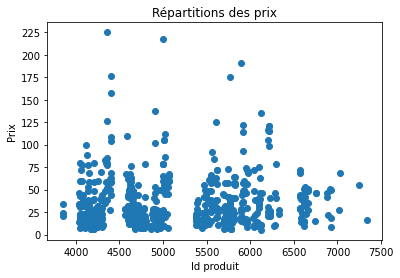

In [13]:
#Crée les axes du graphiques à partir des données du tableau All
x= All["product_id"]
y= All["price"]
#Crée le graphique en nuages de points représentant les répartitions des prix par produit
g=plt.scatter(x,y)

#Nomme le graphique et les axes
plt.title("Répartitions des prix")
plt.xlabel("Id produit")
plt.ylabel("Prix")

#Règle les limites de l'axe Y ainsi que l'écart entre chaque tick
plt.yticks(np.arange(0, 250, 25))
#Affiche le graphique
plt.show()

price
(5, 25]       383
(25, 50]      203
(50, 75]       81
(75, 100]      22
(100, 150]     19
(150, 200]      4
(200, 250]      2
Name: price, dtype: int64
AxesSubplot(0.125,0.125;0.775x0.755)


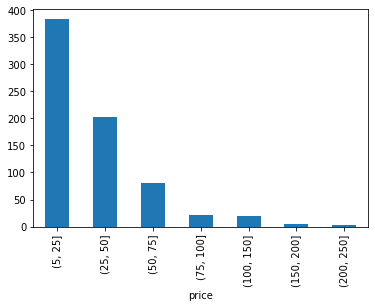

In [14]:
#Crée une liste qui va servir à définir les intervalles de prix qu'on veut comptabiliser
ranges = [5,25,50,75,100,150,200,250]
#Détermine en fonction des intervalles défini la répartition des prix
price_range = All["price"].groupby(pd.cut(All.price, ranges)).count()
#Affiche la répartition des prix sous forme de tableau et de nuage de points
print(price_range)
print(price_range.plot.bar())

## Ecart-type empirique

In [15]:
#Ajoute la colonne dispersion_prix
All["dispersion_prix"]=(All["price"]-prix_moyen)**2
#Calcule l'écart_type empirique des prix.
ete_prix = round(np.sqrt(All["dispersion_prix"].mean()),2)
print("L'écart-type empirique des prix est de",ete_prix)
coef_var=ete_prix/prix_moyen
print("Le coefficient de variation est", round(coef_var,2))

L'écart-type empirique des prix est de 27.79
Le coefficient de variation est 0.86


# Méthode Inter-Quartiles

In [16]:
#Calcule les quartiles des prix
Quartiles = All["price"].quantile([0.25,0.5,0.75])
MaxQ = Quartiles.iloc[2]+((Quartiles.iloc[2]-Quartiles.iloc[0])*1.5)
MinQ = Quartiles.iloc[0]-((Quartiles.iloc[2]-Quartiles.iloc[0])*1.5)
Quartiles

0.25    14.100
0.50    23.550
0.75    42.175
Name: price, dtype: float64

<function matplotlib.pyplot.show(close=None, block=None)>

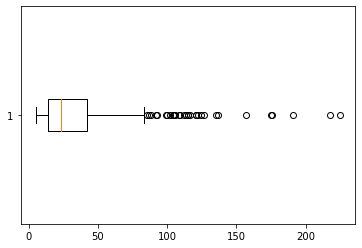

In [17]:
#Affiche la répartition des prix sous forme de boîte à moustache
g2=plt.boxplot(All["price"], vert=False)
plt.show

In [18]:
#Echantillon des valeurs en dehors de la boîte à moustache
Prix_ab = All.loc[All["price"] > MaxQ]
Prix_ab

,product_id,onsale_web,price,stock_quantity,stock_status,sku,virtual,downloadable,rating_count,average_rating,...,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count,CA,dispersion_prix
199,4352,1,225.0,0,outofstock,15940,0,0,0,0.0,...,2020-03-07 10:18:45,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,1125.0,37060.1001
426,5001,1,217.5,20,instock,14581,0,0,0,0.0,...,2020-05-16 07:00:05,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,0.0,34228.7001
587,5892,1,191.3,10,instock,14983,0,0,0,0.0,...,2020-04-01 07:30:09,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,573.9,25220.6161
218,4402,1,176.0,8,instock,3510,0,0,0,0.0,...,2020-08-22 09:35:03,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,2288.0,20595.1201
553,5767,1,175.0,12,instock,15185,0,0,0,0.0,...,2020-06-11 13:25:04,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,0.0,20309.1001
221,4406,1,157.0,3,instock,7819,0,0,0,0.0,...,2020-03-14 15:05:04,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,0.0,15502.7401
381,4904,1,137.0,13,instock,14220,0,0,0,0.0,...,2020-05-19 15:15:02,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,685.0,10922.3401
642,6126,1,135.0,10,instock,14923,0,0,0,0.0,...,2020-08-27 09:45:02,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,270.0,10508.3001
201,4355,1,126.5,2,instock,12589,0,0,0,0.0,...,2020-08-13 08:15:02,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,1391.5,8837.8801
511,5612,1,124.8,12,instock,14915,0,0,0,0.0,...,2019-01-23 08:33:57,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,0.0,8521.1361


# Méthode Z-Score

In [19]:
#Calcule les Z-Scores
All["Z_Score"]=(All["price"]-prix_moyen)/ete_prix

Z_Score
(-1, 0]    465
(0, 1]     169
(1, 2]      50
(2, 3]      16
(3, 4]       8
(4, 5]       1
(5, 6]       3
(6, 7]       2
Name: Z_Score, dtype: int64
AxesSubplot(0.125,0.125;0.775x0.755)


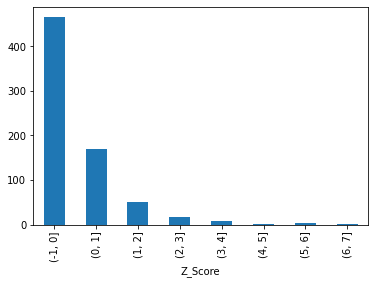

In [20]:
#Crée une liste qui va servir à définir les intervalles de Z Score qu'on veut comptabiliser
ranges = [-1,0,1,2,3,4,5,6,7]
#Détermine en fonction des intervalles défini la répartition des Z Score
Z_Score_range = All["Z_Score"].groupby(pd.cut(All.Z_Score, ranges)).count()
#Affiche la répartition des Z Score sous forme de tableau et d'histogramme
print(Z_Score_range)
print(Z_Score_range.plot.bar())

# Chiffre d'affaire des prix aberrants

In [21]:
CA_ab = Prix_ab["CA"].sum()
print(CA_ab,"€ de chiffre d'affaire pour les prix aberrants.")
CA_ab_perc = round(CA_ab/Total_CA*100,2)
print(CA_ab_perc,"% du Chiffre d'affaire total.")

6970.0 € de chiffre d'affaire pour les prix aberrants.
9.88 % du Chiffre d'affaire total.
